In [5]:
from google.colab import drive
import os
import time

# Mount Google Drive
drive.mount('/content/drive')

# Wait for the drive to mount
time.sleep(5)

# Base directory path
base_dir = '/content/drive/MyDrive/Kaggle_dataset/chest_xray'

# Subdirectories to explore
subdirs = {
    'Training NORMAL': 'train/NORMAL',
    'Training PNEUMONIA': 'train/PNEUMONIA',
    'Validation NORMAL': 'val/NORMAL',
    'Validation PNEUMONIA': 'val/PNEUMONIA',
    'Test NORMAL': 'test/NORMAL',
    'Test PNEUMONIA': 'test/PNEUMONIA'
}

# Function to list files in a directory
def list_files(dir_path):
    try:
        return os.listdir(dir_path)
    except FileNotFoundError:
        return f"Directory not found: {dir_path}"
    except Exception as e:
        return f"An error occurred: {e}"

# List files in each directory
for description, path in subdirs.items():
    full_path = os.path.join(base_dir, path)
    files = list_files(full_path)
    if isinstance(files, list):
        print(f"{description} - Number of files: {len(files)}")
    else:
        print(f"{description} - {files}")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Training NORMAL - Number of files: 1341
Training PNEUMONIA - Number of files: 3875
Validation NORMAL - Number of files: 8
Validation PNEUMONIA - Number of files: 8
Test NORMAL - Number of files: 234
Test PNEUMONIA - Number of files: 390


In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import os


In [7]:
# Define paths
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [8]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size
)


Epoch 1/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 361s 2s/step - accuracy: 0.7403 - loss: 0.5777 - val_accuracy: 0.6250 - val_loss: 0.7705
Epoch 2/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6250 - val_loss: 0.7705
Epoch 3/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 378s 2s/step - accuracy: 0.8057 - loss: 0.4070 - val_accuracy: 0.7500 - val_loss: 0.6448
Epoch 4/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7500 - val_loss: 0.6448
Epoch 5/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 358s 2s/step - accuracy: 0.8681 - loss: 0.2914 - val_accuracy: 0.7500 - val_loss: 0.4795
Epoch 6/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7500 - val_loss: 0.4795
Epoch 7/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 356s 2s/step - accuracy: 0.8922 - loss: 0.2610 - val_accuracy: 0.7500 - val_loss: 0.7618
Epoch 8/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 -

The model's accuracy and loss are reset to zero every other epoch. This issue typically arises due to a few possible causes:

Possible Causes and Solutions
Data Generator Issue: If the ImageDataGenerator is not correctly re-initializing or if there’s an issue with the directory structure, it might not load the images properly every other epoch.


In [10]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')


20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 997ms/step - accuracy: 0.7993 - loss: 0.5310
Test accuracy: 77.88%


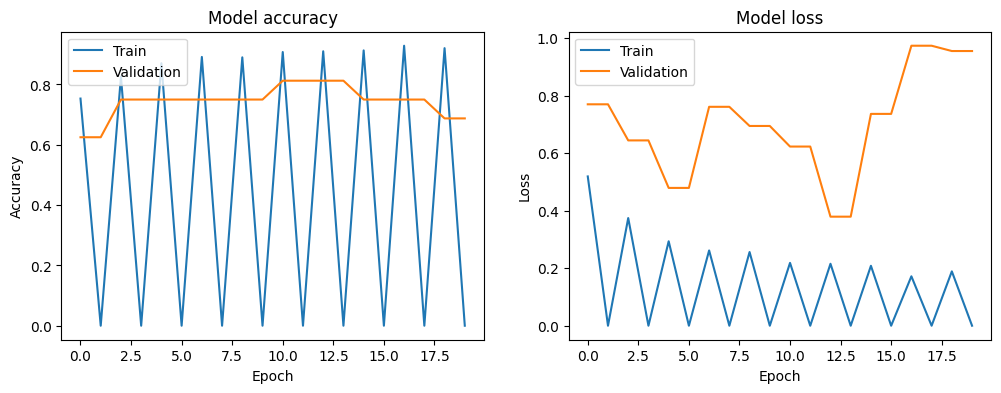

In [11]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()
